In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Figure out path to pwd and data dir
_pwd = os.path.abspath("..")
_data_dir = os.path.join(_pwd, "data")

In [11]:
_perf_dir = os.path.join(_data_dir, 'perf_results_droidkungfu')
_avail_apps = os.listdir(_perf_dir)
_fname = "result.csv"
_perf_files = list(map(lambda app: os.path.join(_perf_dir, app + "/" + _fname), _avail_apps))
print(f"There are {len(_avail_apps)} apps with performance results")
# print(_perf_files)

There are 9 apps with performance results


In [19]:
all_dfs = list(map(lambda perf: pd.read_csv(perf), _perf_files))

In [20]:
df = all_dfs[0]

In [23]:
_apks = df['apk'].unique()
_columns = list(df.columns)
_del_columns = ['apk', 'type']

_metrics = _columns
for _col in _del_columns:
    _metrics.remove(_col)
    
print(f"Data contains {len(_metrics)} metrics")

Data contains 16 metrics


In [31]:
import matplotlib.pyplot as plt

def plot_agg(df, metrics):
    ax = df[metrics].sum().plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_xlabel("Metrics", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
    plt.show()

In [52]:
def plot_by_category(df, metrics):
    fig = plt.subplots(figsize =(12, 8)) 
    print(df['type'].unique())

    _mdf = df.loc[df['type'] == "malicious"][metrics].sum()
    _bdf = df.loc[df['type'] == "benign"][metrics].sum()
    
    N = np.arange(len(df.columns))

    plt.bar(N, _mdf, color ='r', width = barWidth, 
        edgecolor ='grey', label ='IT') 
    plt.bar(N, _bdf, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 

    plt.show() 

['benign' 'malicious']


NameError: name 'barWidth' is not defined

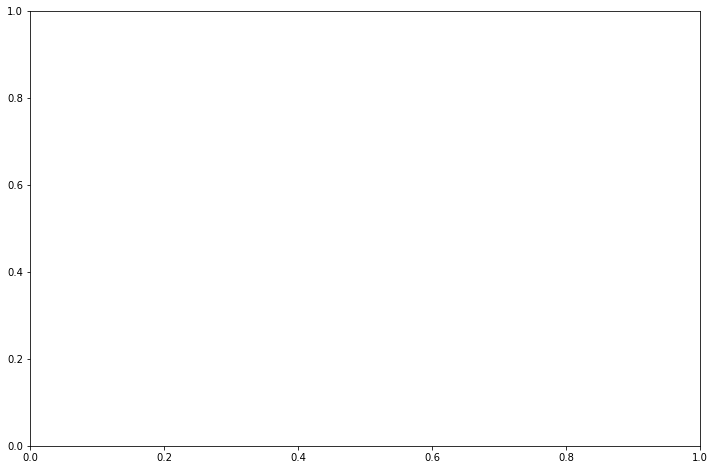

In [53]:
_b_df = df.loc[df['type'] == "benign"]
_m_df = df.loc[df['type'] == "malicious"]

plot_by_category(df, _metrics)

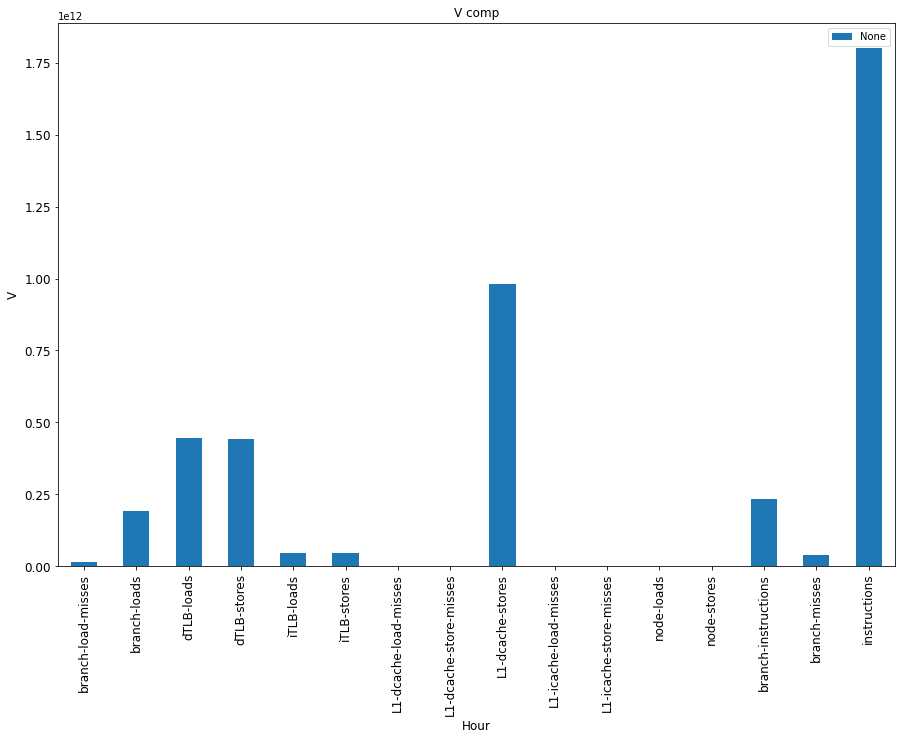

In [28]:
plot_agg(_m_df, _metrics)

In [20]:
def plot_agg_across_types(df, _metrics):
    print(df[_metrics].sum(0).unstack(-1))
#     ax = df[_metrics].sum(1).unstack().plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#     ax.set_xlabel("Hour", fontsize=12)
#     ax.set_ylabel("V", fontsize=12)
#     plt.show()

In [21]:
plot_agg_across_types(entire_df, _metrics)

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed